In [88]:
# setup the backend for matplotlib to inline
%matplotlib inline

import numpy as np
# import matplotlib to plot image
import matplotlib.pyplot as plt
# import sklearn to load mnist data set 
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [89]:
# learn how to use matplotlib to load test image 
# although this is not related to the classifer procedure, it is valuable to get familiar with the matplotlib

# load mnist dataset
digits = datasets.load_digits()

# digits is a (n_samples, n_features) array
display(f"n_samples = {len(digits.data)} and n_features = {len(digits.data[0])}")

'n_samples = 1797 and n_features = 64'

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

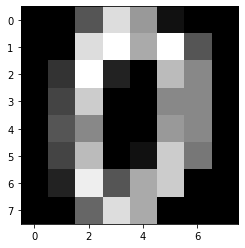

In [90]:
# use the first image as the sample image
sample_image = np.array(digits.data[0]).reshape(8, 8)
sample_image.shape
display(sample_image)
plt.imshow(sample_image, cmap='gray')

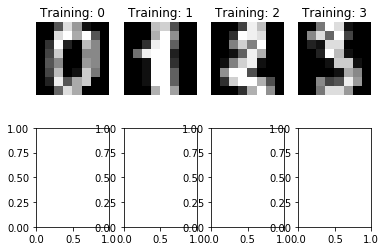

In [85]:
# look at the first 4 images
# here use the digits.images directly
fig, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images[:4], digits.target[:4]))
for ax, (image, label) in zip(axes[0], images_and_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap='gray', interpolation='nearest')
    ax.set_title(f'Training: {label}')

In [224]:
# function to get the predictions
def get_predictions(X_train, X_test, y_train, y_test):
    # calculate the squared vector norms
    train_norms = np.array([X_train[i, :].dot(X_train[i, :]) for i in range(X_train.shape[0])])
    train_norms = np.broadcast_to(train_norms, (X_test.shape[0], train_norms.shape[0]))

    # calculate the distance for each X_test, ignore the squared vector norms for X_test[i] since they are same
    distances = train_norms - 2 * X_test.dot(X_train.T)
    # get the prediction as the label which has the minimum distance from the test input
    return y_train[np.argmin(distances, axis=1)]

In [227]:
%%timeit -r1 -n1
# collect errors using 1000 subsets
errors = []
for i in range(1): 
    # split data into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        digits.data, digits.target, test_size=0.5, shuffle=True
    )
    predictions = get_predictions(X_train, X_test, y_train, y_test)
    error = 1 - np.mean(np.equal(predictions, y_test))
    errors.append(error)

print(f"error rate is {np.mean(errors)}")

error rate is 0.017797552836484987
32.6 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
